In [41]:
from scripts_fermions.operators import Hamiltonian, Boost, measure_local_observables
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import yastn
import yastn.tn.mps as mps

In [42]:
g = 1
t, v, Q = 0, 1, 0
N = 512
D = 128
a = 0.125
#
m = 0.5
#
ops = yastn.operators.SpinlessFermions(sym='U1', tensordot_policy='no_fusion')
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/ex/**/state_D=*.npy")
fnames = glob.glob(glob_path, recursive=True)
fex = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", f"{N=}", f"{a=:0.4f}", f"{D=}"])])
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/gs/**/state_D=*.npy")
fnames = glob.glob(glob_path, recursive=True)
fgs = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", f"{N=}", f"{a=:0.4f}", f"{D=}"])])
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/ex/**/state_D=*_boosted.npy")
fnames = glob.glob(glob_path, recursive=True)
fbt = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", f"{N=}", f"{a=:0.4f}", f"{D=}"])])
#
def fn_mass(fns, **kwargs):
    return [x for x in fns if all( f"{k}={v}" in x for k, v in kwargs.items())][0]
#
d_ex = np.load(fn_mass(fex, m=m), allow_pickle=True).item()
d_gs = np.load(fn_mass(fgs, m=m), allow_pickle=True).item()
d_boost = np.load(fn_mass(fbt, m=m), allow_pickle=True).item()


In [43]:
H = Hamiltonian(N, m, g, t, a, v, Q, ops)
K = Boost(N, m, g, a, ops)

psi_ex = yastn.from_dict(d_ex['psi'])
psi_gs = yastn.from_dict(d_gs['psi'])

E_ex = mps.vdot(psi_ex, H, psi_ex).real
E_gs = mps.vdot(psi_gs, H, psi_gs).real

print(E_ex)
print(E_gs)
print(E_ex - E_gs)

-1304.8464455966696
-1306.3635588289726
1.5171132323030179


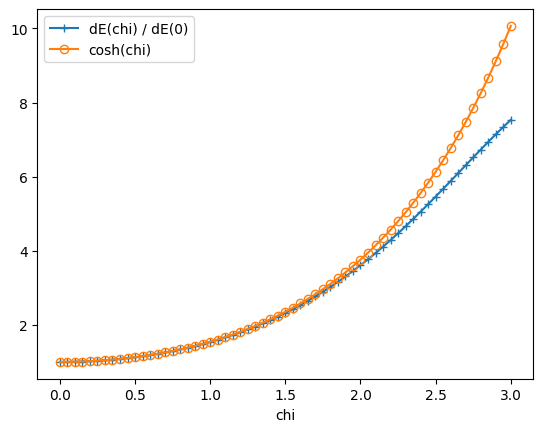

In [44]:
chis = d_boost['chis']
dE = np.array(d_boost['energy']).real - E_gs
plt.plot(chis, dE / dE[0], '-+', label='dE(chi) / dE(0)')
plt.plot(chis, np.cosh(chis), '-o', fillstyle='none', label='cosh(chi)')
plt.xlabel("chi")
plt.legend()


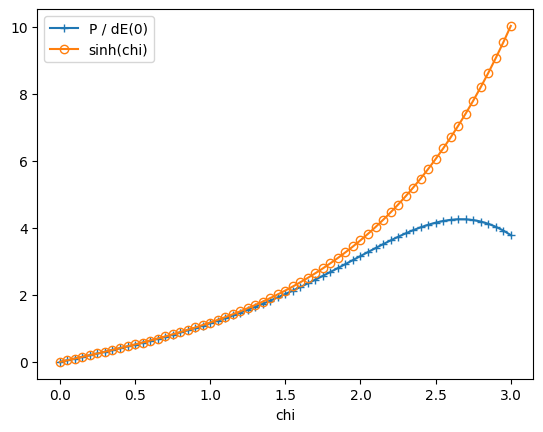

In [45]:
chis = d_boost['chis']
Ps = np.sum(np.array(d_boost['T01']).real, axis=1) * a
plt.plot(chis, Ps / dE[0], '-+', label='P / dE(0)')
plt.plot(chis, np.sinh(chis), '-o', fillstyle='none', label='sinh(chi)')
plt.xlabel("chi")
plt.legend()


In [46]:
egs={}
egs['T00'], egs['T11'], egs['T01'], egs['j0'], egs['j1'], egs['nu'], egs['Ln'] = measure_local_observables(psi_gs, 0, a, g, m, 1, 0, ops)

In [47]:
def plot_dist(val, subtract_gs=True):
    cm = plt.cm.jet
    normalize = matplotlib.colors.Normalize(vmin=0, vmax=2)

    for ii, chi in enumerate(d_boost['chis']):
        if chi <= 2:
            y = d_boost[val][ii]
            if subtract_gs:
                y = y - egs[val]
            plt.plot(y, color=cm(normalize(chi)))


    # setup the normalization and the colormap

    # setup the colorbar
    scalarmappaple = matplotlib.cm.ScalarMappable(norm=normalize, cmap=cm)
    scalarmappaple.set_array([])
    plt.colorbar(scalarmappaple, ax=plt.gca(), label='chi')
    plt.title(val)


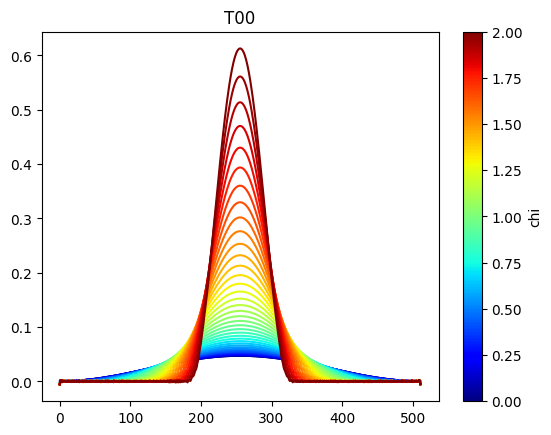

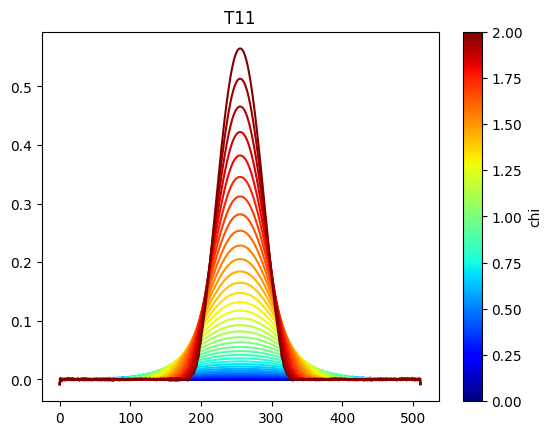

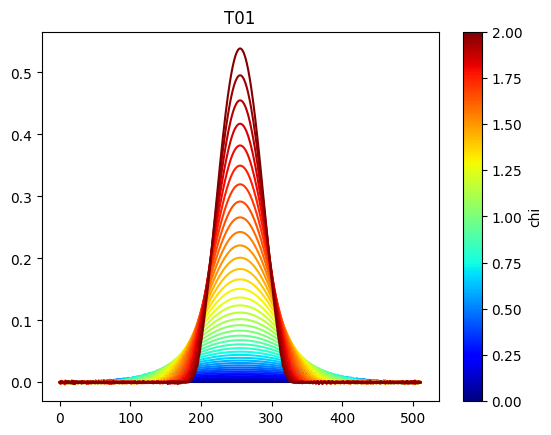

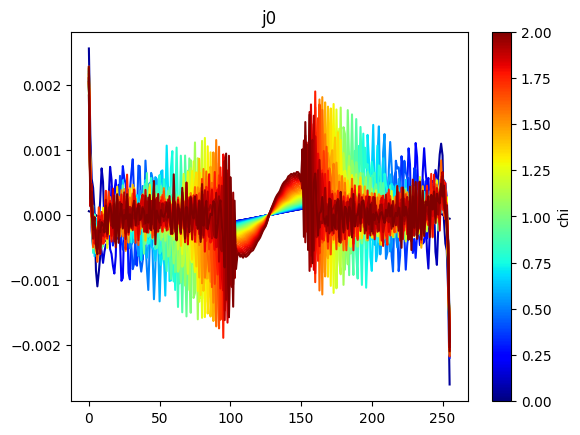

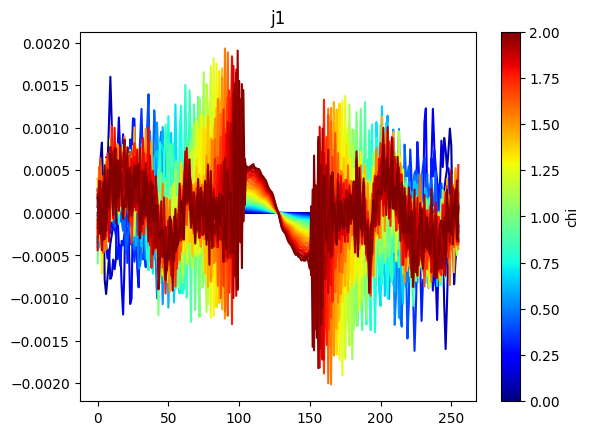

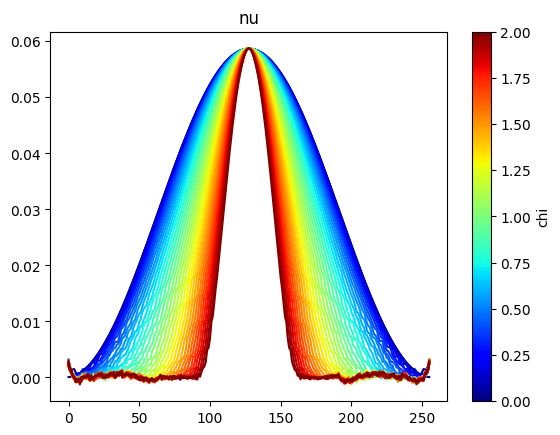

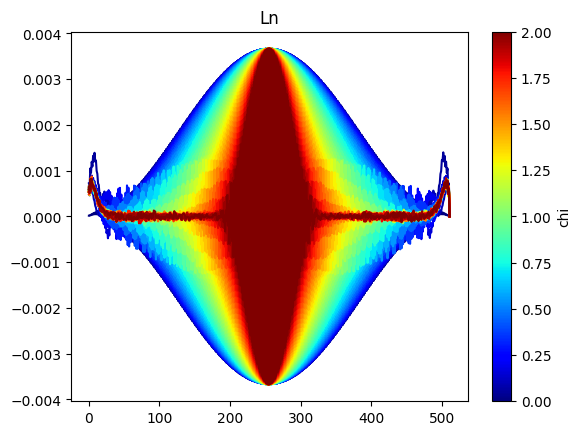

In [48]:
for val in ['T00', 'T11', 'T01', 'j0', 'j1', 'nu', 'Ln']:
    plot_dist(val, subtract_gs=True)
    plt.show()
